In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

df = pd.read_csv('/Users/HamadaSalimGTrd/Downloads/obesity_data_clean.csv')

df.head()

,gender,age,height,weight,family_history,high_cal_diet,freq_veggie,amt_daily_meals,freq_snacking,smoking,amt_water,cal_monitoring,exercise_per_week,time_technology,freq_alcohol,transport,obesity_group,obesity_group_cont
0,female,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,public_transportation,normal_weight,1
1,female,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,public_transportation,normal_weight,1
2,male,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,public_transportation,normal_weight,1
3,male,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,walking,overweight_level_i,2
4,male,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,public_transportation,overweight_level_ii,3


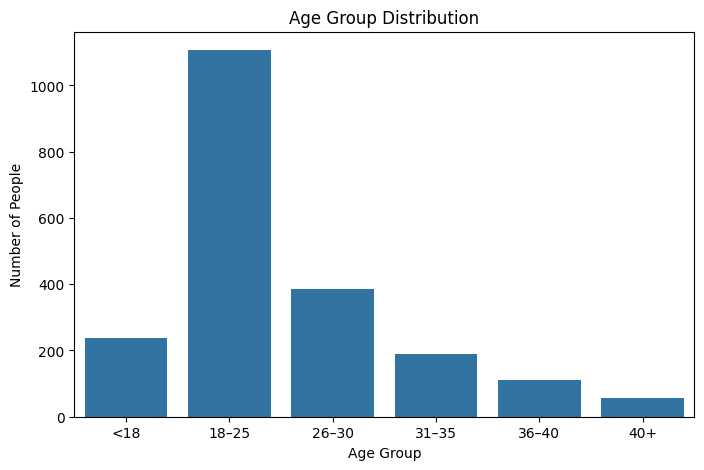

In [3]:
# Created age groups (extra column)
bins = [0, 18, 25, 30, 35, 40, 100]
labels = ['<18', '18–25', '26–30', '31–35', '36–40', '40+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)

# Plot age group counts
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', data=df, order=labels)
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Number of People')
plt.show()


In [4]:
age_distribution = df['age_group'].value_counts().sort_index()
print(age_distribution)


age_group
<18       238
18–25    1107
26–30     386
31–35     188
36–40     111
40+        57
Name: count, dtype: int64


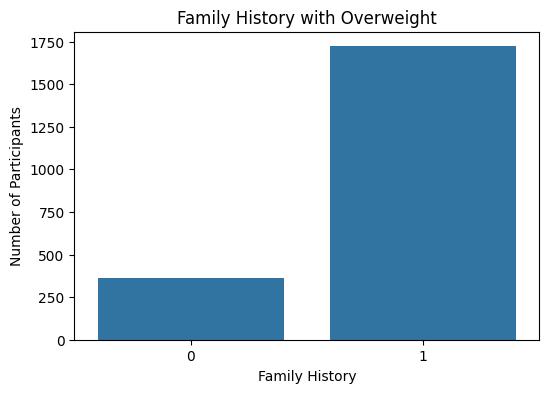

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='family_history', data=df)
plt.title('Family History with Overweight')
plt.xlabel('Family History')
plt.ylabel('Number of Participants')
plt.show()


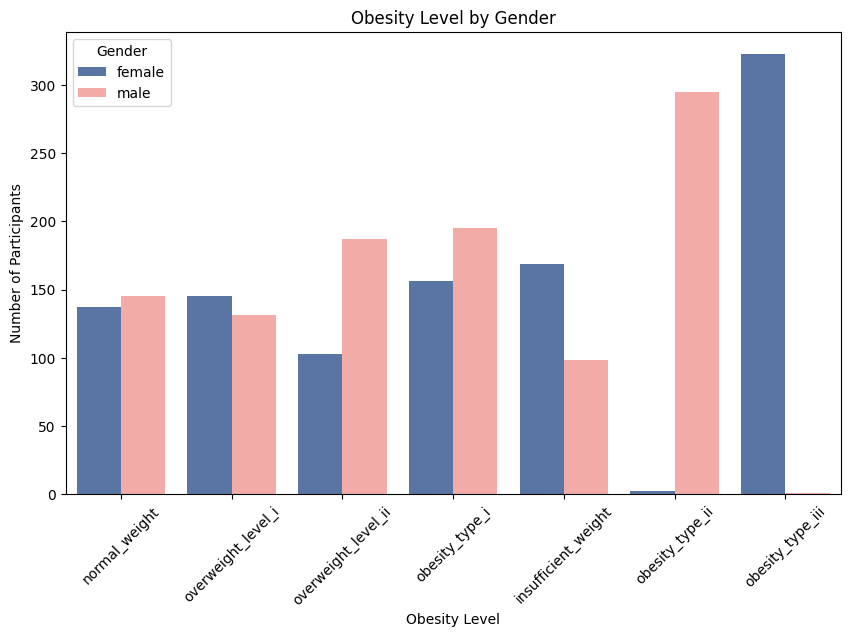

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='obesity_group',
    hue='gender',
    data=df,
    palette=['#4C72B0', '#FF9F9B']  # Muted blue + soft rose
)
plt.title('Obesity Level by Gender')
plt.xlabel('Obesity Level')
plt.ylabel('Number of Participants')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

In [7]:
df['family_history'] = df['family_history'].map({0: 'No', 1: 'Yes'}) 
#I converted 0 and 1 labels to yes and no labels for better understanding.

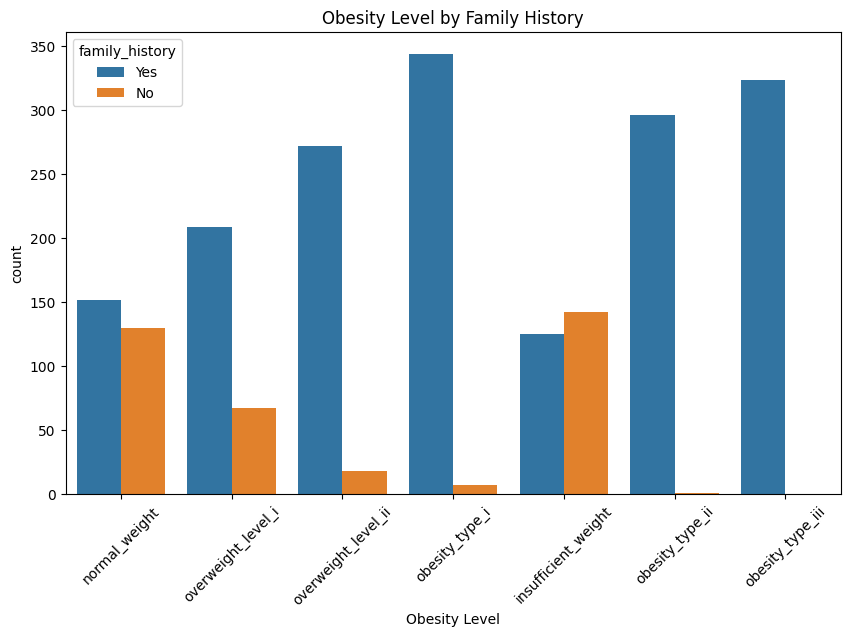

In [10]:
plt.figure(figsize=(10,6))
sns.countplot(x='obesity_group', hue='family_history', data=df)
plt.title('Obesity Level by Family History')
plt.xlabel('Obesity Level')
plt.xticks(rotation=45)
plt.show()


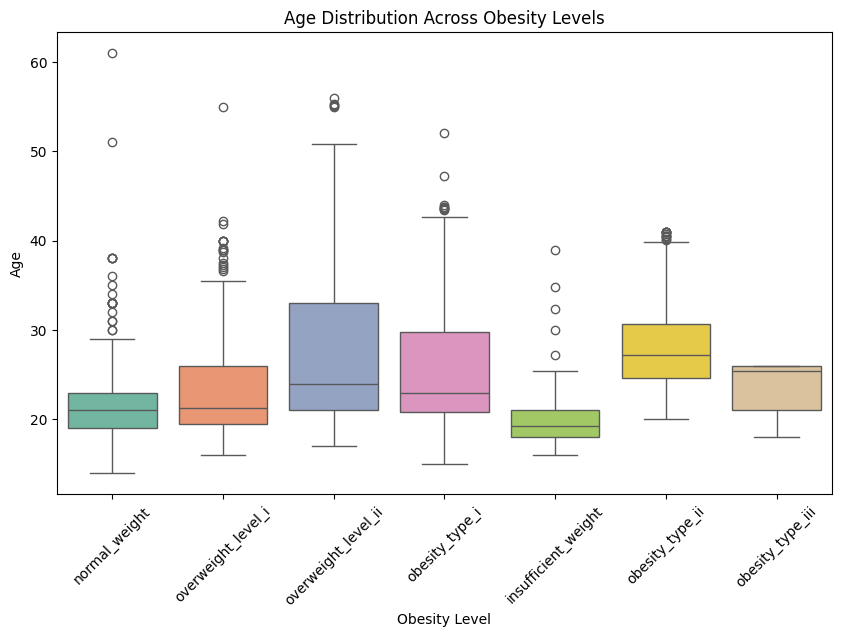

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(x='obesity_group', y='age', data=df, hue='obesity_group', palette='Set2', legend=False)
plt.title('Age Distribution Across Obesity Levels')
plt.xlabel('Obesity Level')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()
